<font size="+3"><strong> Exploratory Data Analysis </strong></font>

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import zipfile
import os 

warnings.simplefilter(action="ignore", category=FutureWarning)

# Import Data

In [2]:
# Define the path to the uploaded ZIP file
zip_path = "insurance+company+benchmark+coil+2000.zip"
path = "/mnt/data/extracted_files"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(path)

# List the extracted files
files = os.listdir(path)
#files

In [3]:
column_names = [
    "MOSTYPE", "MAANTHUI", "MGEMOMV", "MGEMLEEF", "MOSHOOFD", "MGODRK", "MGODPR", "MGODOV", "MGODGE",
    "MRELGE", "MRELSA", "MRELOV", "MFALLEEN", "MFGEKIND", "MFWEKIND", "MOPLHOOG", "MOPLMIDD", "MOPLLAAG",
    "MBERHOOG", "MBERZELF", "MBERBOER", "MBERMIDD", "MBERARBG", "MBERARBO", "MSKA", "MSKB1", "MSKB2",
    "MSKC", "MSKD", "MHHUUR", "MHKOOP", "MAUT1", "MAUT2", "MAUT0", "MZFONDS", "MZPART", "MINKM30",
    "MINK3045", "MINK4575", "MINK7512", "MINK123M", "MINKGEM", "MKOOPKLA", "PWAPART", "PWABEDR", "PWALAND",
    "PPERSAUT", "PBESAUT", "PMOTSCO", "PVRAAUT", "PAANHANG", "PTRACTOR", "PWERKT", "PBROM", "PLEVEN",
    "PPERSONG", "PGEZONG", "PWAOREG", "PBRAND", "PZEILPL", "PPLEZIER", "PFIETS", "PINBOED", "PBYSTAND",
    "AWAPART", "AWABEDR", "AWALAND", "APERSAUT", "ABESAUT", "AMOTSCO", "AVRAAUT", "AAANHANG", "ATRACTOR",
    "AWERKT", "ABROM", "ALEVEN", "APERSONG", "AGEZONG", "AWAOREG", "ABRAND", "AZEILPL", "APLEZIER",
    "AFIETS", "AINBOED", "ABYSTAND", "CARAVAN"
]

# Load the dataset 
df = pd.read_csv("/mnt/data/extracted_files/ticdata2000.txt", sep="\t", header=None, names=column_names)

# Print object type and shape for DataFrames
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (5822, 86)


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# Inspect dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   5822 non-null   int64
 1   MAANTHUI  5822 non-null   int64
 2   MGEMOMV   5822 non-null   int64
 3   MGEMLEEF  5822 non-null   int64
 4   MOSHOOFD  5822 non-null   int64
 5   MGODRK    5822 non-null   int64
 6   MGODPR    5822 non-null   int64
 7   MGODOV    5822 non-null   int64
 8   MGODGE    5822 non-null   int64
 9   MRELGE    5822 non-null   int64
 10  MRELSA    5822 non-null   int64
 11  MRELOV    5822 non-null   int64
 12  MFALLEEN  5822 non-null   int64
 13  MFGEKIND  5822 non-null   int64
 14  MFWEKIND  5822 non-null   int64
 15  MOPLHOOG  5822 non-null   int64
 16  MOPLMIDD  5822 non-null   int64
 17  MOPLLAAG  5822 non-null   int64
 18  MBERHOOG  5822 non-null   int64
 19  MBERZELF  5822 non-null   int64
 20  MBERBOER  5822 non-null   int64
 21  MBERMIDD  5822 non-null   int64
 22  

In [9]:
df['CARAVAN'].value_counts(normalize=True) 

CARAVAN
0    0.940227
1    0.059773
Name: proportion, dtype: float64

In [6]:
# List of multivariate features to analyze
columns = ["MOSTYPE", "MGEMLEEF", "MOSHOOFD", "MGODRK", "PWAPART"]

# Obtain summary statistics for the DataFrame.
df[["MOSTYPE", "MGEMLEEF", "MOSHOOFD", "MGODRK", "PWAPART"]].describe()

,MOSTYPE,MGEMLEEF,MOSHOOFD,MGODRK,PWAPART
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,2.991240,5.773617,0.696496,0.771213
std,12.846706,0.814589,2.856760,1.003234,0.958623
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,10.000000,2.000000,3.000000,0.000000,0.000000
50%,30.000000,3.000000,7.000000,0.000000,0.000000
75%,35.000000,3.000000,8.000000,1.000000,2.000000
max,41.000000,6.000000,10.000000,9.000000,3.000000


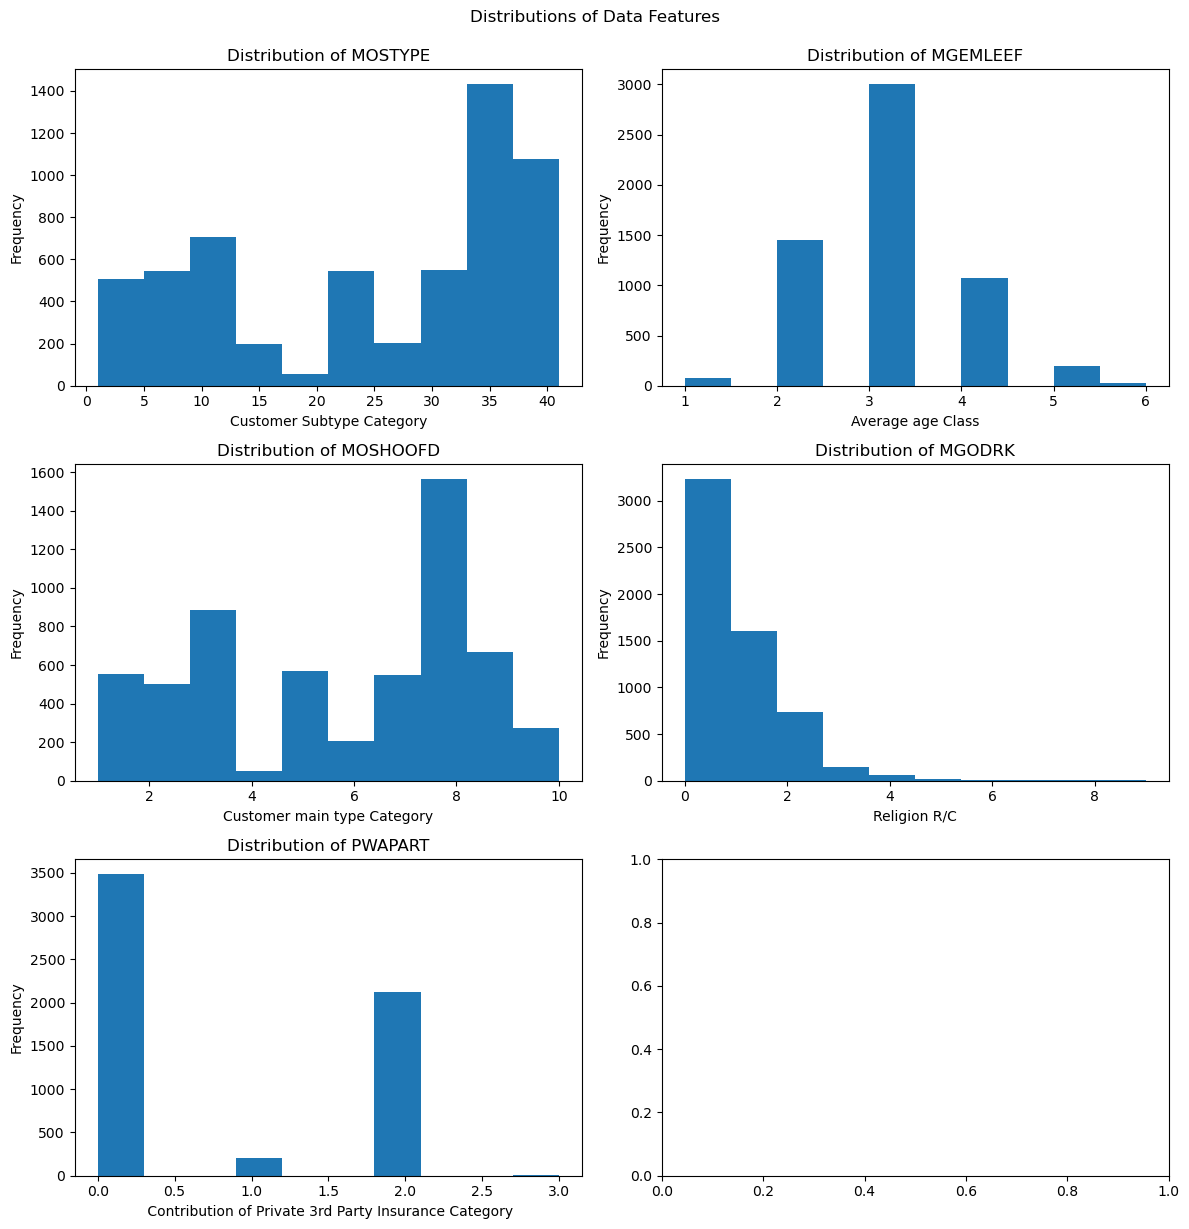

In [7]:
# Create a 3x2 grid of subplots (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# List Features to plot (including 5 variables)
variables = ["MOSTYPE", "MGEMLEEF", "MOSHOOFD", "MGODRK", "PWAPART"]

# Dictionary for custom x-axis labels
x_labels = {
    "MOSTYPE": "Customer Subtype Category",
    "MGEMLEEF": "Average age Class",
    "MOSHOOFD": "Customer main type Category",
    "MGODRK": "Religion R/C",
    "PWAPART": " Contribution of Private 3rd Party Insurance Category"
}

# Plot histograms for each variable
for ax, var in zip(axs.flat, variables):
    ax.hist(df[var])
    ax.set_xlabel(x_labels[var])           # Use custom x-axis labels
    ax.set_ylabel('Frequency')             # Y-axis label
    ax.set_title(f'Distribution of {var}') # Title for each subplot

# axs[2, 1].axis('off') # Eliminate the extra subplot in the grid

# Adjust layout and add main title
plt.tight_layout()
plt.suptitle('Distributions of Data Features', y=1.02)
plt.show()

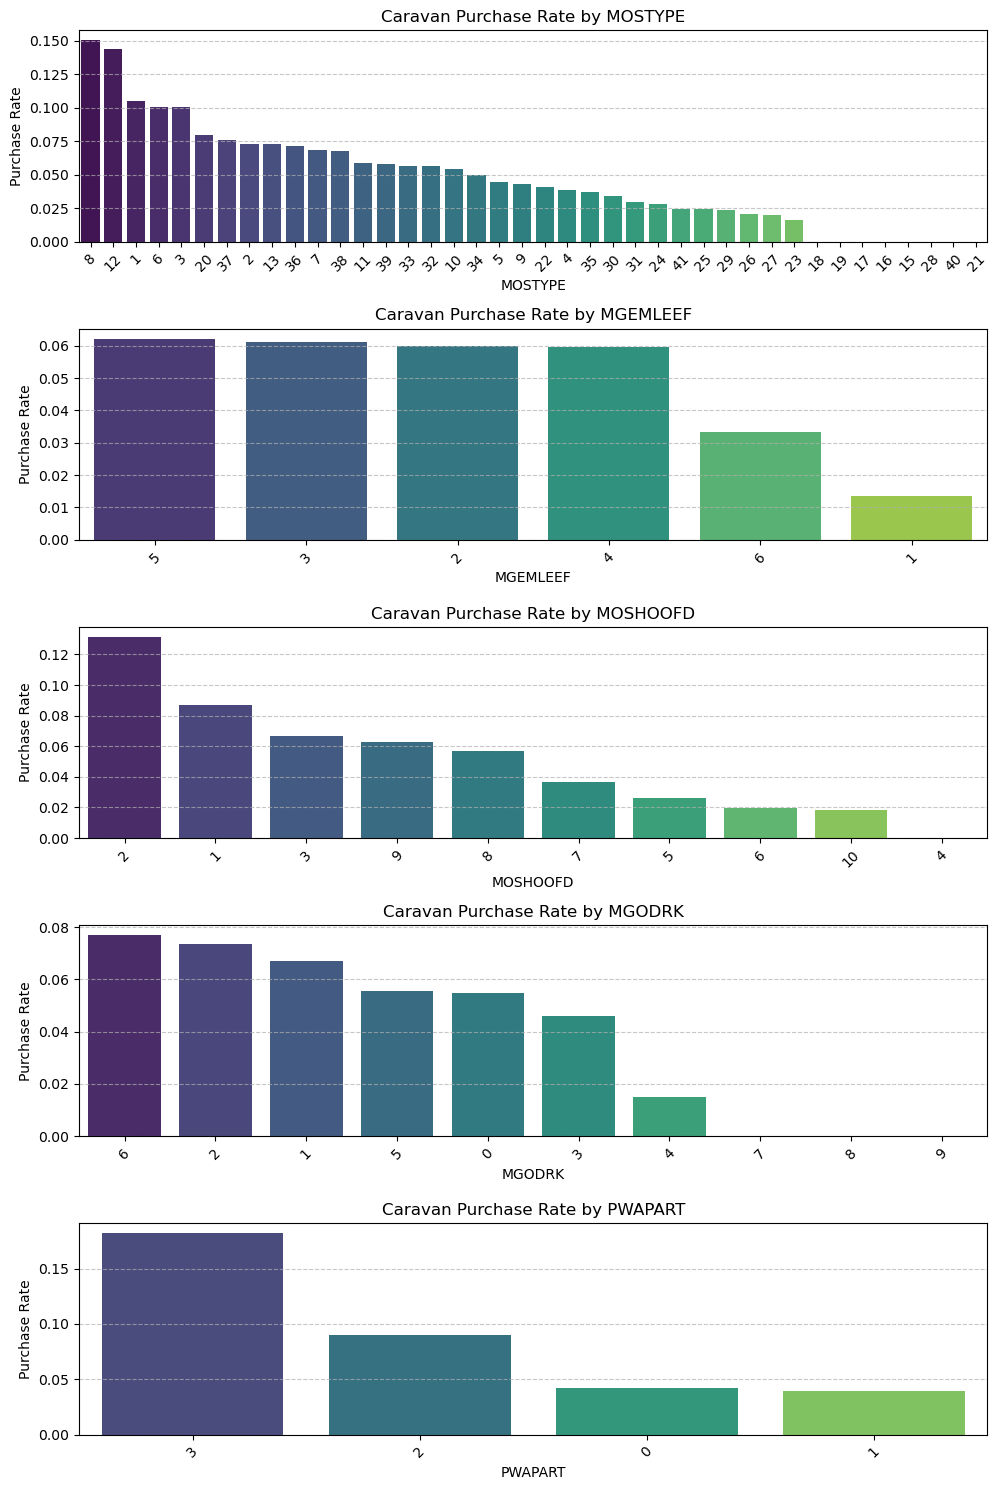

In [8]:
# Calculate mean CARAVAN (purchase rate) for each group in every column
mean_by_feature = {
    col: df.groupby(col)["CARAVAN"].mean().sort_values(ascending=False)
    for col in columns
}

# Create subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Loop through each column and plot
for ax, col in zip(axes, columns):
    # Get the sorted purchase rates for the current column
    data = mean_by_feature[col]
    
    # Plot bar chart
    sns.barplot(x=data.index.astype(str), y=data.values, ax=ax, palette="viridis")
    
    # Customize plot
    ax.set_title(f'Caravan Purchase Rate by {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Purchase Rate', fontsize=10)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels for readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

plt.tight_layout()
plt.show()

---
<center>
<table>
  <tr>
    <th>Date (YYYY-MM-DD)</th>
    <th>Author</th>
  </tr>
  <tr>
    <td>2025-03-16</td>
    <td>Andrew Kalumba Harris</td>
    <td> | andrewkalumbaharris@gmail.com</td>
  </tr>
</table>
</center>